# Funciones de distribución de probabilidades
## Distribución Uniforme

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
a = 1
b = 100
n = 10000
data = np.random.uniform(a, b, n)

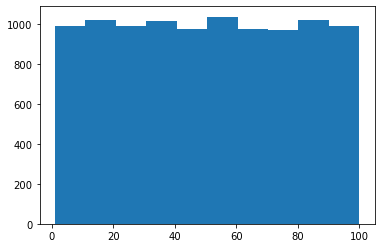

In [5]:
#Utilizamos matplotlib para pintar un histograma
%matplotlib inline
plot = plt.hist(data)

# Distribución de Gauss

In [13]:
data = np.random.randn(1000000)

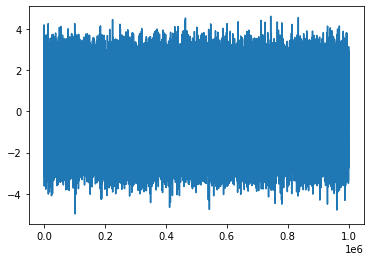

In [14]:
x= range(1,1000001)
plt.plot(x,data)

(array([2.90000e+01, 1.07700e+03, 1.70000e+04, 1.10156e+05, 3.01535e+05,
        3.53232e+05, 1.76071e+05, 3.74280e+04, 3.33800e+03, 1.34000e+02]),
 array([-4.97840967, -4.01837763, -3.05834559, -2.09831354, -1.1382815 ,
        -0.17824945,  0.78178259,  1.74181463,  2.70184668,  3.66187872,
         4.62191076]),
 <a list of 10 Patch objects>)

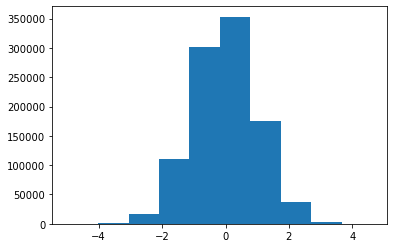

In [15]:
plt.hist(data)

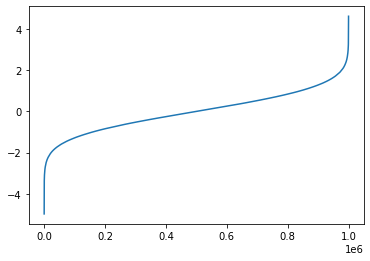

In [16]:
plt.plot(x, sorted(data))

## Podriamos querer una normal con otra media y otra desviación

(array([   6.,   62.,  372., 1324., 2693., 2915., 1860.,  638.,  115.,
          15.]),
 array([-4.66161854, -2.69608178, -0.73054503,  1.23499173,  3.20052848,
         5.16606524,  7.13160199,  9.09713875, 11.0626755 , 13.02821225,
        14.99374901]),
 <a list of 10 Patch objects>)

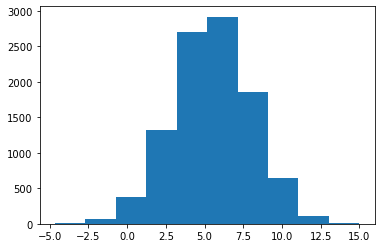

In [20]:
mu = 5.5
sd = 2.5
z_10000 = np.random.randn(10000)
data = mu + sd*z_10000 # Z = (X-mu)/sd   tipificar, convertir cualquier
#variable aleatoria en una normal standard.
plt.hist(data)

In [23]:
data = np.random.randn(2, 4)
data
#Da dos muestras aleatorias de tamaño 4, las cuales cada una conformara una camapan de Gauss
#En el caso de no especificar nada nos genera un solo aleatorio de la normal standar.
#Esto se hace para genera datasets

array([[ 0.76825654,  0.845031  , -0.43291016,  1.56853137],
       [ 0.28634536,  0.46026355,  1.02587893,  0.03179424]])

# La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1
* Calcularemos x*x + y*y
  * Si el valor es inferior a 1 estamos dentro del círculo
  * Si el valor es superior a 1 estamos fuera del círculo
  * El círculo marca la distancia.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos
  entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro     del círculo y usamos dicha probabilidad para aproximar el valor de $\pi$.
  Repetimos el experimento un número suficiente de veces para obtener diferentes aproximaciones de     $\pi$ 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de $\pi$   
    
    

In [37]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0;
    pi_value_list = []
    for i in range(100):
        value = 0
        x = np.random.uniform(0, 1, n).tolist() 
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j] + y[j]*y[j])
            if z<= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/100

    print(pi)
    fig = plt.plot(pi_value_list)
    return(pi, fig)

# Generación de Dummy Data Sets

In [40]:
data = pd.DataFrame({
    'A' : np.random.randn(10),
    'B' : 1.5 + 2.5 * np.random.randn(10),
    'C' : np.random.uniform(5, 32, 10)
})

In [43]:
data.describe()

,A,B,C
count,10.000000,10.000000,10.000000
mean,-0.195295,0.535136,15.247638
std,0.949259,2.902238,7.593814
min,-2.323749,-4.687045,5.136583
25%,-0.569531,-1.324733,10.563863
50%,0.031632,0.828827,12.914273
75%,0.417819,2.777852,20.331786
max,0.987988,4.675354,27.620316


In [44]:
data = pd.read_csv("customer-churn-model/Customer Churn Model.txt")

In [45]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [46]:
column_names = data.columns.values.tolist()

In [47]:
a = len(column_names)

In [55]:
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
}, index = range(42, 42 + a)
), 